# Let's now look at Filtering, a very basic and Primitive Signal Processing application and it's implementation

### Before we get into the details of filtering, we need some motivation as to why we need filtering

### Filtering:  
Similar to the term familiar to all of us from English, filtering involves removal of some unwanted components  
In the realm of signal processing these 'components' are often frequencies  

Frequencies form an integral part of any signal processing analysis as they are the building blocks of our entire understanding of this domain

### Types of Filters:

Based on their frequency response we can basically classify filters into 4 main types:
    - Low Pass Filter          :   Low Frequency components are passed
    - High Pass Filter         :   High Frequency components are passed
    - Band Pass Filter         :   Frequencies that belong to a certain band are passed
    - Band Stop Filter (Notch) :   Frequencies outside a certain band are passed
    
<img src="filters.jpg">  

### Denoising

Any information signal when transmitted is corrupted with noise  
To increase the meaningfulness of the received data we implement denoising  

Any noise prevalent in our signal must be removed for faithful reception and interpretation of our information  

What could we use for removing this 'noise'?  
Filtering of course!

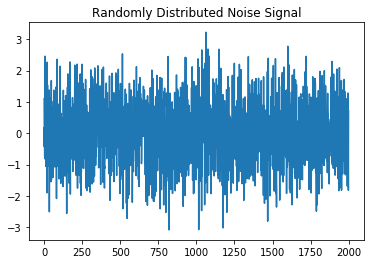

In [23]:
# Sample Noise Generator
import numpy as np
import matplotlib.pyplot as plt
import random
noise = np.random.normal(0,1,2000)
plt.plot(noise)
plt.title('Randomly Distributed Noise Signal')
plt.show()

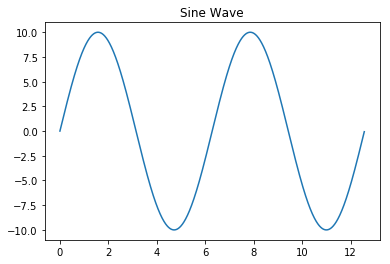

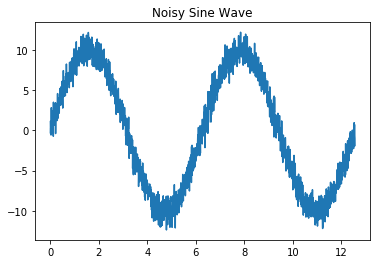

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

x = (2*np.pi)*np.arange(2000)*(1/1000)
y = 10*np.sin(x)

y_noisy = y + noise


plt.title("Sine Wave")
plt.plot(x,y)
plt.show()

plt.plot(x,y_noisy)
plt.title("Noisy Sine Wave")
plt.show()

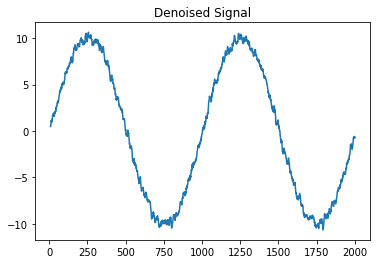

In [27]:
import pandas as pd
import warnings

# Let's ignore any warnings the code throws up for the time being
warnings.filterwarnings('ignore')


# Implement a rolling mean
out = pd.rolling_mean(y_noisy,10)

plt.plot(out)
plt.title('Denoised Signal')
plt.show()

### Well, we managed to remove some of the jagged edges didn't we?

So how exactly did this happen?  

If you carefully observe, the function called 'Rolling Mean' basically implements a type of averaging  
For a rolling mean of length n, replace the nth sample of data with the average of the previous n samples (the current sample included)  

Why does this work?  

If you are familiar with the concept of Z-transforms, what we have implemented is basically a delay and add filter  

The underlying principle is that the noise is Gaussian in nature, and on addition of a sufficient number of samples this noise would effectively cancel out

** Your task : Try to imporve the performance of the Low Pass Filter by changing the parameter in the Rolling Mean Function **

What happens when the number is increased?  
What happens if it is decreased?  

Try changing the numbers until you obtain what you think is a 'Good' response

In [29]:
# Your code here






So what did you observe?  
Increasing the parameter had a profound effect didn't it?  
So how exactly did this work?  
What do you think this number in the function does?  

Hopefully this has made clear the importance of the Low Pass Filter and the Moving average function!

This figure might help you understand why increasing the parameter had such a profound effect:

<img src="moving_avg.png"> 

By increasing the number of samples over which we take the average, we effectively lower the cutoff frequency, thereby improving the rejection of the high frequency component (that is, the noise)


## High Pass Filtering

A high pass filter is basically the opposite of a low pass filter  

Components below a certain frequency threshold are to be discarded and only those above this cutoff are to be transmitted  

So let's try to implement one then!

## High Pass Filtering - An Intuitive Approach

For Low Pass Filtering, we implemented a rolling mean, that is the average of the previous n samples

Fundamentally, LPFs and HPFs are the opposite of each other  
So how do you think an HPF will be implemented?  

If you guessed that we use a backward difference, you're absolutely right!

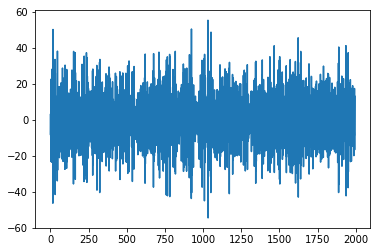

In [51]:
# High Pass Filter Implementation

n = 5
hpf = np.diff(y_noisy,n)
plt.plot(hpf)
plt.show()

### Again play with the parameter to see how the filter output changes

See if you can appreciate the High Pass Filter by comparing the output response with the noisy signal!

In [35]:
# Your Code Here




In [52]:
# Let's calculate the error!

error = mse = (np.square(noise[n:] - hpf)).mean()
print(error)

250.794022309
